# Introduction to Numpy powered by oneAPI

### Learning Obejctives:

- Desribe why replacing inefficient code, such as time consuming loops, wastes resources, and time
- Describe why using Python for highly repetitive small tasks is inefficient
- Describe the additive value of leveraging packages such as Numpy which are powered by oneAPI in a cloud world 
- Describe the importance of keeping oneAPI and 3rd party package such as Numpy, Scipy and others is important
- Enumerate ways in which Numpy accelerates code
- Apply loop replacement methodologies in a variety of scenarios


#### Here is a list of topics we will explore in this module:
- The "WHY", Why use Numpy as replacement for loops?: Its FAST!
- Numpy Universal Functions or ufuncs
- Numpy Broadcasting 
- Numpy Aggregations
- Numpy Where
- Numpy Select
- A quick refernce to Scipy algorithms to set the satge for the next module 

### Replacing Inefficient code
![SLowWadeWater.PNG](Assets/SlowWadeWater.png)

Code that written inefficiently:
- Be less readable (less pythonic)
- Can consume more time
- Waste energy 
- Waste purchased or leased resources

This module will focus on trying to simulatenously make code readbale as well as more efficient as measured by how well we accerlate code examples. While the code exmpale themselves are small examples, the techniques described are application in a wide variety of scenarios in AI.

### Python loops are bad for performance
**Python is great!** Its a great  language for AI. There are many, many advantages in using Python especially for data science.
- easy to program (dont worry about data types and persnicity syntax at least relative to C/C++ and other languges
- FAST for deveoping code!
- leverages huge array of libaries to conquer any domain
- lots of quick answers to common issues in Stack Exchange

#### Python, however, is slow for Massively repeating small tasks - such as found in loops! **Python loops are SLOW**

- Compared to C, C++, Fortran and other typed languages
- Python is forced to look up every occurnace and type of variable in a loop to determine what operations it can perform on that data type
- It cannot usually take advantage of advances in hardware in terms of vector width increases, multiple cores, new instructions from a new HW instruction set, new AI accelerators, effective amd cache meory layout, and more

#### BUT: Python has library remedies to these ills!
- Importing key libnraries shift the burden of computation to highly efficient code
- Numpy, for example, through its focus on elementwise efficient operations, gives indirect access to the efficiencies afforded in "C"  
- libraies included in oneAPI and Numpy, Scipy, Scikit-learn all powered by oneAPI give access to modern advancements in hardware level: access to better cache and memory usage, access to low level vector instructions, and more.
- By leveraging packages such as these powered by oneAPI AND keeping libraries up to date, more capability is added to your underlyig frameworks so that moving code, epsecially in a cloud world, can give you ready access to hardware accerlations, in many cases, without having to modify code this vectorized code
- Routines are written in C (based on CPython framework)
- Numpy arrays are densely packed arrays of homogeneous type. Python lists, by contrast, are arrays of pointers to objects, even when all of them are of the same type. So, you get the benefits of not having to check data types, and you also get locality of reference. Also, many Numpy operations are implemented in C, avoiding the general cost of loops in Python, pointer indirection and per-element dynamic type checking. The speed boost depends on which operations you’re performing. 
            
**Goal of this module: Search and destroy (replace) loops**

Avoid loops if you can - find an alternative if possible. Sometime it cannot be done - true data dependecies may limit our options. But many, many time there are alternatives.


**The problem** 
- Loops isolate your code from hardware and software advances that update frequently.
- They prevent you from effectively using key underlying resources - it is a waste.
- They consume your time!

### Reference:

- [Video:  **Losing your Loops Fast Numerical Computing with NumPy** by Jake VanderPlas ](https://www.youtube.com/watch?v=EEUXKG97YRw). 

- [Book:  **Python Data Science Handbook** by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/). 

- [Book:  **Elegant SciPy: The Art of Scientific Python** by by Juan Nunez-Iglesias, Stéfan van der Walt, Harriet Dashnow](https://www.amazon.com/Elegant-SciPy-Art-Scientific-Python/dp/1491922877)

- [Article:  **The Ultimate NumPy Tutorial for Data Science Beginners**](https://www.analyticsvidhya.com/blog/2020/04/the-ultimate-numpy-tutorial-for-data-science-beginners/) :   by Aniruddha April 28, 2020 at www.analyticsvidhya.com

- [Academic Lecture pdf: **Vectorization** by  Aaron Birkland Cornell CAC](http://www.cac.cornell.edu/education/training/StampedeJune2013/Vectorization-2013_06_18.pdf)

# Exercises (7 in total):

Do a page search for each **Exercise** in this notebook. Complete All seven exercises. Code in cells above each exercise may give insight into a solid approach

## Why use Numpy as replacement for loops?

## Its FAST!

In this section we will explore a smattering a different Numpy approaches that lead to accelerations over naive loops

The bigger (more iterations) of a loop the better Numpy gets and the bigger (more dimensions of data) the better Numpy gets as a general rule.

Ultimately, we are hunting to **"BIG LOOPS"**. What is a BIG LOOP? One that consumes a lot of time! Sometimes, even a loop with somehat smaller iteration can be time consuming because each iteration takes long by itself. Well call these BIG LOOP too.

#### Compare different ways of computing Log10 of a lager vector

In this next sectoin, we will create a list of 1-million random floating point numbers. Then we will use **for** loop to iterate over its elements, take **Log10** and store the value in another list. We'll compare the execution speed with that of a direct NumPy Log10 operation.

for this log10 problem, We will compare
- Naive loop
- Map function
- List Comprehension
- Numpy

#### Import updated libraries

In [1]:

import numpy as np
from math import log10 as lg10
import time
import matplotlib.pyplot as plt
import random
%matplotlib inline

#### Create a list of 1 million numbers

# Numpy Universal Functions (ufuncs)

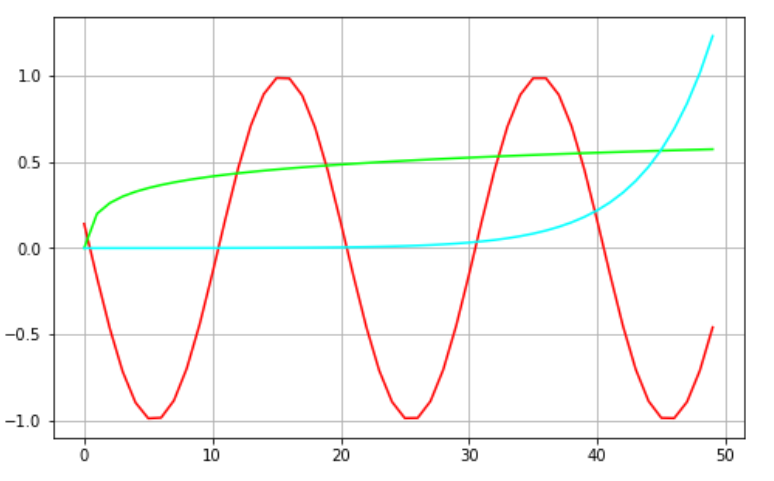


**Functions that operate element by element on whole arrays.**

A [universal function](https://numpy.org/doc/stable/reference/ufuncs.html) (or ufunc for short) is a function that operates on ndarrays in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features. That is, a ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs. For detailed information on universal functions, see Universal functions (ufunc) basics.

### Available ufuncs
There are currently more than [60 universal functions](https://numpy.org/doc/stable/reference/ufuncs.html)  defined in numpy on one or more types, covering a wide variety of operations. 
- **Methods for reductions:** reduce, accumulate, outer, ...
- **Math Functions:** log, exp, matmul, mod, multiply, add, ...
- **Trigonometric functions:** sin, cosine, tan, arcsin, hypot, ...
- **Bit-twiddling functions:** bitwise_and, bitwise_or, invert, left_shift, ...
- **Comparison functions:** greater, less_than, not_equal, logical_and ...
- **Floating functions:** isfinite, isinf, isnan, isnat, fabs, ... 

** Infix notation** (looks like simple math on arrays)
- **a + b**  Some of these ufuncs are called automatically on arrays when the relevant infix notation is used (e.g., add(a, b) is called internally when a + b is written and a or b is an ndarray).
- You may still want to use the ufunc call in order to use the optional output argument(s) to place the output(s) in an object (or objects) of your choice.


Many ufuncs also have built in reductions that can be applied

- One common operation used in AI frequently is maximum or minimum

- The Python function max() will find the maximum over a one-dimensional array, but it will do so using a slower sequence interface. 

- The reduce method of the maximum ufunc is much faster. 

- Also, the max() method will not give answers you might expect for arrays with greater than one dimension. 

- The reduce method of minimum also allows you to compute a total minimum over an array.

Here are simple examples for **log, exp cumulative sums and products**, etc:

In [2]:
# Muliple all elements in a vector together
print("multiply all elements of [2,3,5]" )
print(np.multiply.reduce([2,3,5]))

X = np.arange(8).reshape((2,2,2))
print("\nContents of X")
print(X)

print("\nSum all values of X")
print(np.sum(X))

print("\nAdd all values of X to itself")
print(np.add(X, X))

print("\nAdd all values of X by column")
print(np.add.reduce(X, axis = 0))

print("\nAdd all values of X by row")
print(np.add.reduce(X, axis = 1))


multiply all elements of [2,3,5]
30

Contents of X
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]

Sum all values of X
28

Add all values of X to itself
[[[ 0  2]
  [ 4  6]]

 [[ 8 10]
  [12 14]]]

Add all values of X by column
[[ 4  6]
 [ 8 10]]

Add all values of X by row
[[ 2  4]
 [10 12]]


### Naive Loop:

Apply **exp** to every element of array **a**

In [3]:
import math
L = 710
a = np.arange(1, L) # get sequence of numbers
collectExp1 = []
t1 = time.time()
timing = {}
for i in range(L-1):
    collectExp1.append(math.exp(a[i]))
t2 = time.time()
print("elapsed time: ", t2-t1)
timing['LoopExp'] = t2 - t1

elapsed time:  0.000331878662109375


### Numpy Loop:

Apply **exp** to every element of array **a**

In [4]:
t1 = time.time()
collectExp2 = np.exp(a)
t2 = time.time()
print("elapsed time: ", t2-t1)
timing['NumpyExp'] = t2 - t1
print("acceleation: {:4.0f} X".format( timing['LoopExp']/timing['NumpyExp']))

elapsed time:  0.00019431114196777344
acceleation:    2 X


### Naive Loop:

Apply **log**  to every element of array **a**

In [15]:
import math
L = 1000000
a = np.arange(1, L) # get sequence of numbers
collectLogs1 = []
t1 = time.time()
timing = {}
for i in range(L-1):
    collectLogs1.append(math.log(a[i]))
t2 = time.time()
print("elapsed time: ", t2-t1)
timing['LoopLogs'] = t2 - t1

elapsed time:  0.27765703201293945


## Exercise:

Complete writing the equivalent Numpy fnctionality to the loop version above to compute **log10** for every element of array **a**
```
a = np.log10(a)
```

In [16]:
t1 = time.time()
### Complete the code below #####

ReplaceThisBrokenCode

#####################

t2 = time.time()
print("elapsed time: ", t2-t1)
timing['NumpyLog'] = t2 - t1
print("acceleation: {:4.0f} X".format( timing['LoopLogs']/timing['NumpyLog']))

elapsed time:  0.008239984512329102
acceleation:   34 X


<BarContainer object of 2 artists>

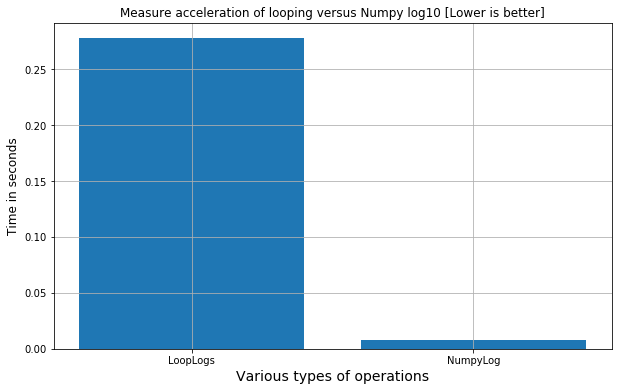

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy log10 [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

### Cummulative sums and products

Numpy as functions to perform cummulative sums and prodcuts also

Examine the loop below to add up all numbers in an array and keep track of the running sums

In [8]:
L = 100000000
a = np.arange(L) # get sequence of numbers
timing = {}
t1 = time.time()
S = []
s = 0
for el in a:
    s += el
    S.append(s)
t2 = time.time()
timing['loop cumulative sum'] = t2 - t1
print("elapsed time: ", t2-t1)
print("a \n", a[:6])
print("S[:6]\n",S[:6]) 

elapsed time:  18.241342067718506
a 
 [0 1 2 3 4 5]
S[:6]
 [0, 1, 3, 6, 10, 15]


# Exercise:

Write a Numpy vectorized cell below to compute the running sum **S**, similar to loop above for input array **a**

In [20]:

a = np.arange(L) # get sequence of numbers

t1 = time.time()
##### insert single line numpy code below ####

ReplaceThisBrokenCode

##############################################
t2 = time.time()
timing['numpy cumulative sum'] = t2 - t1
print("elapsed time: ", t2-t1)
print("a \n", a[:6])
print("S[:6]\n",S[:6]) 

elapsed time:  0.9157967567443848
a 
 [0 1 2 3 4 5]
S[:6]
 [ 0  1  3  6 10 15]


<BarContainer object of 2 artists>

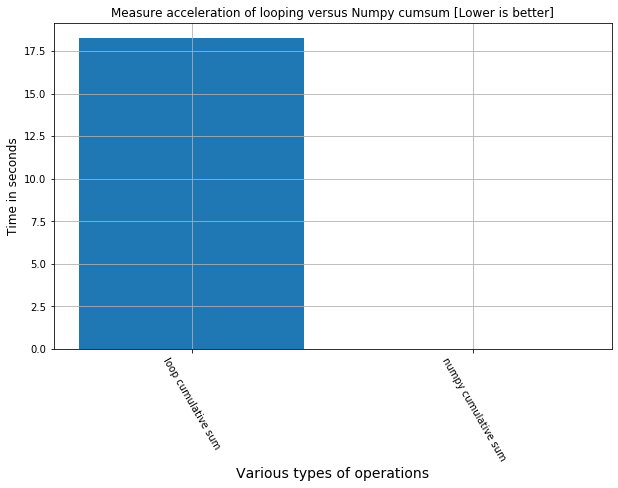

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy cumsum [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation = -60)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

Whatever loopy code you have - spend time looking for alternatives such as this. The acceleration can be exrardinary

In [11]:
print("Done")

Done
